***
# ***Analyzing Tweets - SLLS5027A***
***

<a id="section-4"></a>
### ***Table of Contents***
- [Imports](#7)
  * [Library Installations](#6)
  * [Python Libraries](#8)
  * [Dataset](#9)

- [Data Overview](#19)

- [Question 1](#25)
    * [Retweet Network](#9)

- [Question 2](#26)
  * [A. Correlation Analysis](#27)
  * [B. Average Engagement Metrics For Specfic Intervals](#29)

  


***
# ***Imports***
***

## ***Library Installations***

In [ ]:
%pip install networkx
%pip install python-louvain

## ***Importing Libraries***

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

### ***Dataset***

In [ ]:
# Displays a max of 400 characters in each column
pd.options.display.max_colwidth = 400
# Displays a max of 95 columns if it happens there are more within out dataset
pd.options.display.max_columns = 95


# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/PGDip/Semester 2/exam_data.csv")

<ipython-input-16-eb4268c3e166>:8: DtypeWarning: Columns (28,29,31,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/PGDip/Semester 2/exam_data.csv")


***
# ***Data Overview***
***

In [ ]:
# Displaying basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292826 entries, 0 to 292825
Data columns (total 83 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     292826 non-null  int64  
 1   conversation_id                        292826 non-null  int64  
 2   referenced_tweets.replied_to.id        29125 non-null   float64
 3   referenced_tweets.retweeted.id         203629 non-null  float64
 4   referenced_tweets.quoted.id            17156 non-null   float64
 5   author_id                              292826 non-null  int64  
 6   in_reply_to_user_id                    30060 non-null   float64
 7   in_reply_to_username                   25799 non-null   object 
 8   retweeted_user_id                      203629 non-null  float64
 9   retweeted_username                     203629 non-null  object 
 10  quoted_user_id                         17156 non-null   

In [ ]:
# Displaying first five rows
df.head()

id      conversation_id  referenced_tweets.replied_to.id  \
0  1633980240702873600  1633980240702873600                              NaN   
1  1633973219651907585  1633973219651907585                              NaN   
2  1633942566436470785  1633942566436470785                              NaN   
3  1633931246568079360  1633931246568079360                              NaN   
4  1633931088061157377  1633931088061157377                              NaN   

   referenced_tweets.retweeted.id  referenced_tweets.quoted.id  \
0                    1.633776e+18                          NaN   
1                    1.633776e+18                          NaN   
2                    1.633896e+18                          NaN   
3                    1.633776e+18                          NaN   
4                    1.633776e+18                          NaN   

             author_id  in_reply_to_user_id in_reply_to_username  \
0           2428352827                  NaN                  NaN   
1  1367248925233573888                  NaN                  NaN   
2  1243948346236174337                  NaN                  NaN   
3   813959297637810176                  NaN                  NaN   
4            543245067                  NaN                  NaN   

   retweeted_user_id retweeted_username  quoted_user_id quoted_username  \
0       1.504669e+18      ImSooooOverIt             NaN             NaN   
1       1.504669e+18      ImSooooOverIt             NaN             NaN   
2       7.335221e+07       AngeloKhatib             NaN             NaN   
3       1.504669e+18      ImSooooOverIt             NaN             NaN   
4       1.504669e+18      ImSooooOverIt             NaN             NaN   

                 created_at  \
0  2023-03-09T23:57:01.000Z   
1  2023-03-09T23:29:07.000Z   
2  2023-03-09T21:27:19.000Z   
3  2023-03-09T20:42:20.000Z   
4  2023-03-09T20:41:43.000Z   

                                                                                                                                                                                                                           text  \
0  @ayrestim @SenatorWong AUSTRALIANS 🇦🇺 DO NOT STAND WITH UKRAINE! \n\nAnd WE know, that YOU know, you shouldn't either!\n\nHow much laundry 💵  are YOU doing?\n\n#istandwithrussia \n#IStandWithPutin https://t.co/JADmcLTPh3   
1  @ayrestim @SenatorWong AUSTRALIANS 🇦🇺 DO NOT STAND WITH UKRAINE! \n\nAnd WE know, that YOU know, you shouldn't either!\n\nHow much laundry 💵  are YOU doing?\n\n#istandwithrussia \n#IStandWithPutin https://t.co/JADmcLTPh3   
2                         @elisamariastel1 @Yoda15271485 Anche io sostengo  pubblicamente, non "l'aggressione", ma "l'intervento" militare della Russia in Ucraina e vorrei essere processato.\n#Russia #Putin #IStandWithPutin   
3  @ayrestim @SenatorWong AUSTRALIANS 🇦🇺 DO NOT STAND WITH UKRAINE! \n\nAnd WE know, that YOU know, you shouldn't either!\n\nHow much laundry 💵  are YOU doing?\n\n#istandwithrussia \n#IStandWithPutin https://t.co/JADmcLTPh3   
4  @ayrestim @SenatorWong AUSTRALIANS 🇦🇺 DO NOT STAND WITH UKRAINE! \n\nAnd WE know, that YOU know, you shouldn't either!\n\nHow much laundry 💵  are YOU doing?\n\n#istandwithrussia \n#IStandWithPutin https://t.co/JADmcLTPh3   

  lang  source  public_metrics.impression_count  public_metrics.reply_count  \
0   en     NaN                             1023                           5   
1   en     NaN                             1023                           5   
2   it     NaN                              229                           4   
3   en     NaN                             1023                           5   
4   en     NaN                             1023                           5   

   public_metrics.retweet_count  public_metrics.quote_count  \
0                            18                           3   
1                            18                           3   
2                             2                           0   
3    

***
# ***Question 1***
***

***What are the implications of the percentage of duplicates in the dataset on the general understanding of the issue it covered?***


- Duplicates could result in inflated engagement metrics, potentially distorting the genuine level of involvement in a specific matter.

- They may suggest automated or spam-like behaviour, impacting the reliability of the dataset.

- The existence of duplicate tweets might disproportionately influence the visibility of trending topics or popular discussions, creating a skewed perception of the overall sentiment or significance of an issue.

- Statistical analyses, such as correlation or sentiment analysis, may be distorted by duplicate tweets, as they assign greater importance to specific content.

- They could signal the participation of bots or spam accounts, compromising the authenticity of the content and the perceived importance of the issue.

## ***Retweet Network***

***Due to the lack of sufficient computational power I used a sub-sample of 30 000 rows to create my retweet network.*** I used the Louvain Communities Detection algoirthm to find the communities or clusters within the retweets network. I displayed my results using two layouts; Spring Layout and Circular Layout. I used the Degree Centrality to find the top 5 influencers and clusters. For easier visibility i differentiated the color of the top 5 from the rest of the communities.

In [ ]:
# creating the sub-sample
df_clustering = df.iloc[:30_000, :]

# dropping the missing values in the retweeted usernames column to use it for the negtwork analysis
df_clustering = df_clustering.dropna(subset=['retweeted_username'])

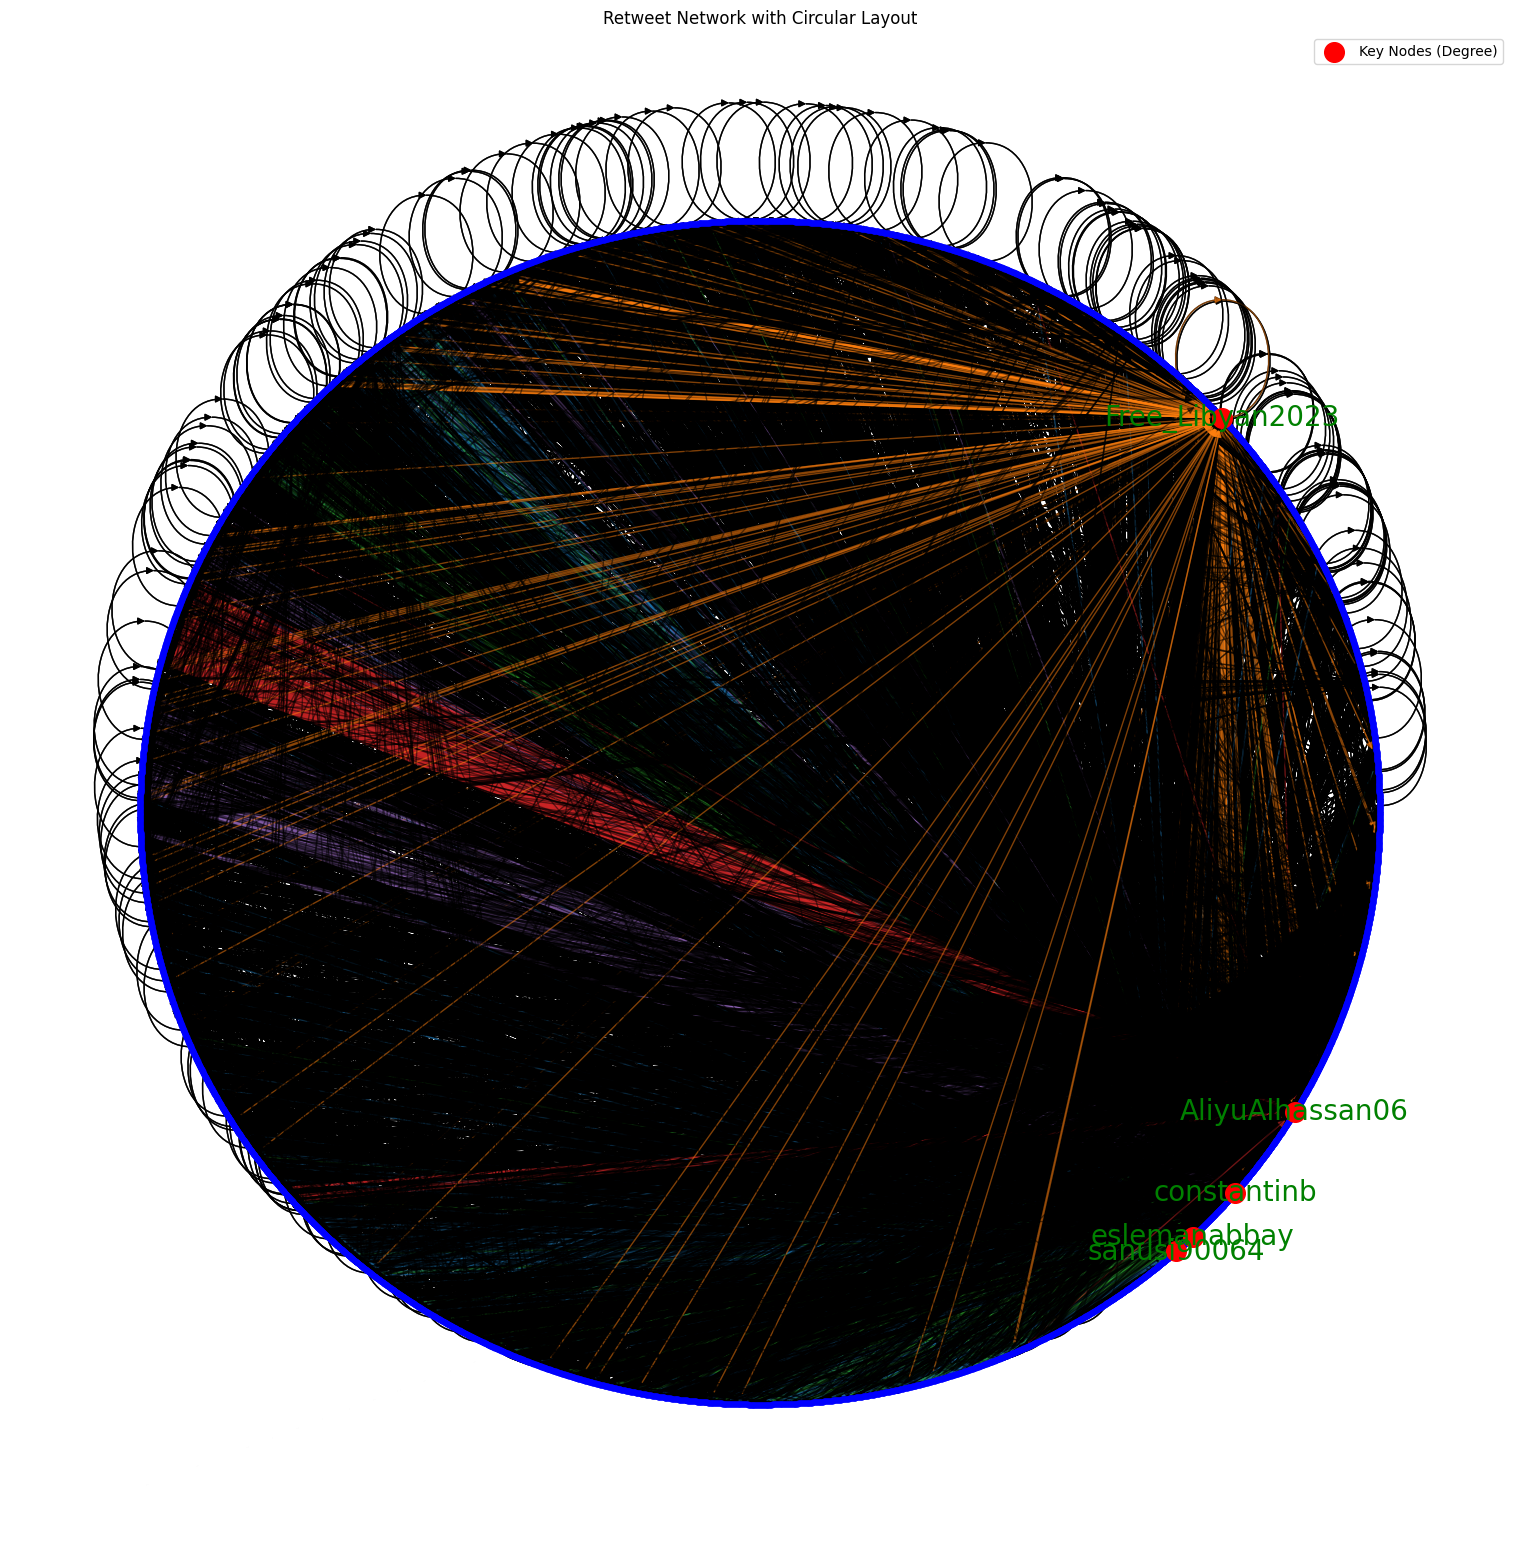

In [ ]:
# creating a directed graph
G = nx.DiGraph()

# nodes of the graph
G.add_nodes_from(df_clustering['author.username'].dropna())

# edges of the graph
G.add_edges_from(zip(df_clustering['author.username'], df_clustering['retweeted_username']))

# calculating the degree centrality to obtained the influential users
degree_centrality = nx.degree_centrality(G)
key_nodes_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

# Community Detection (Louvain Method)
clusters = nx.community.louvain_communities(G)

# layout of the communities
pos = nx.circular_layout(G)

# figure size
plt.figure(figsize=(15, 15))

# The whole graph with key nodes highlighted
nx.draw(G, pos, with_labels=False, font_size=6, font_color='black', node_size=10, node_color='blue')

# black edges
black_edges = [edge for edge in G.edges() if edge not in [(u, v) for u, v in G.edges() if u in key_nodes_degree or v in key_nodes_degree]]
nx.draw_networkx_edges(G, pos, edgelist=black_edges, edge_color='black', alpha=0.5)

# assigining a color template to color egdes for each of the top 5 influential users
user_colors = sns.color_palette("tab10", n_colors=len(key_nodes_degree))
edge_colors = []

# looking through the non-influential users and influential users
for edge in G.edges():
    user1, user2 = edge
    if user1 in key_nodes_degree:
        color_index = key_nodes_degree.index(user1)
        edge_colors.append(user_colors[color_index])   # adding color to influential users
    elif user2 in key_nodes_degree:
        color_index = key_nodes_degree.index(user2)
        edge_colors.append(user_colors[color_index])
    else:
        edge_colors.append('black')  # adding black color to non-influential users

# the colored edges and nodes for the top 5 influential users
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=key_nodes_degree, node_color='red', node_size=200, label='Key Nodes (Degree)')

# the labels for the top 5 influential users
labels = {node: node for node in key_nodes_degree}
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_color='green')

plt.title('Retweet Network with Circular Layout')
plt.legend()
plt.show()


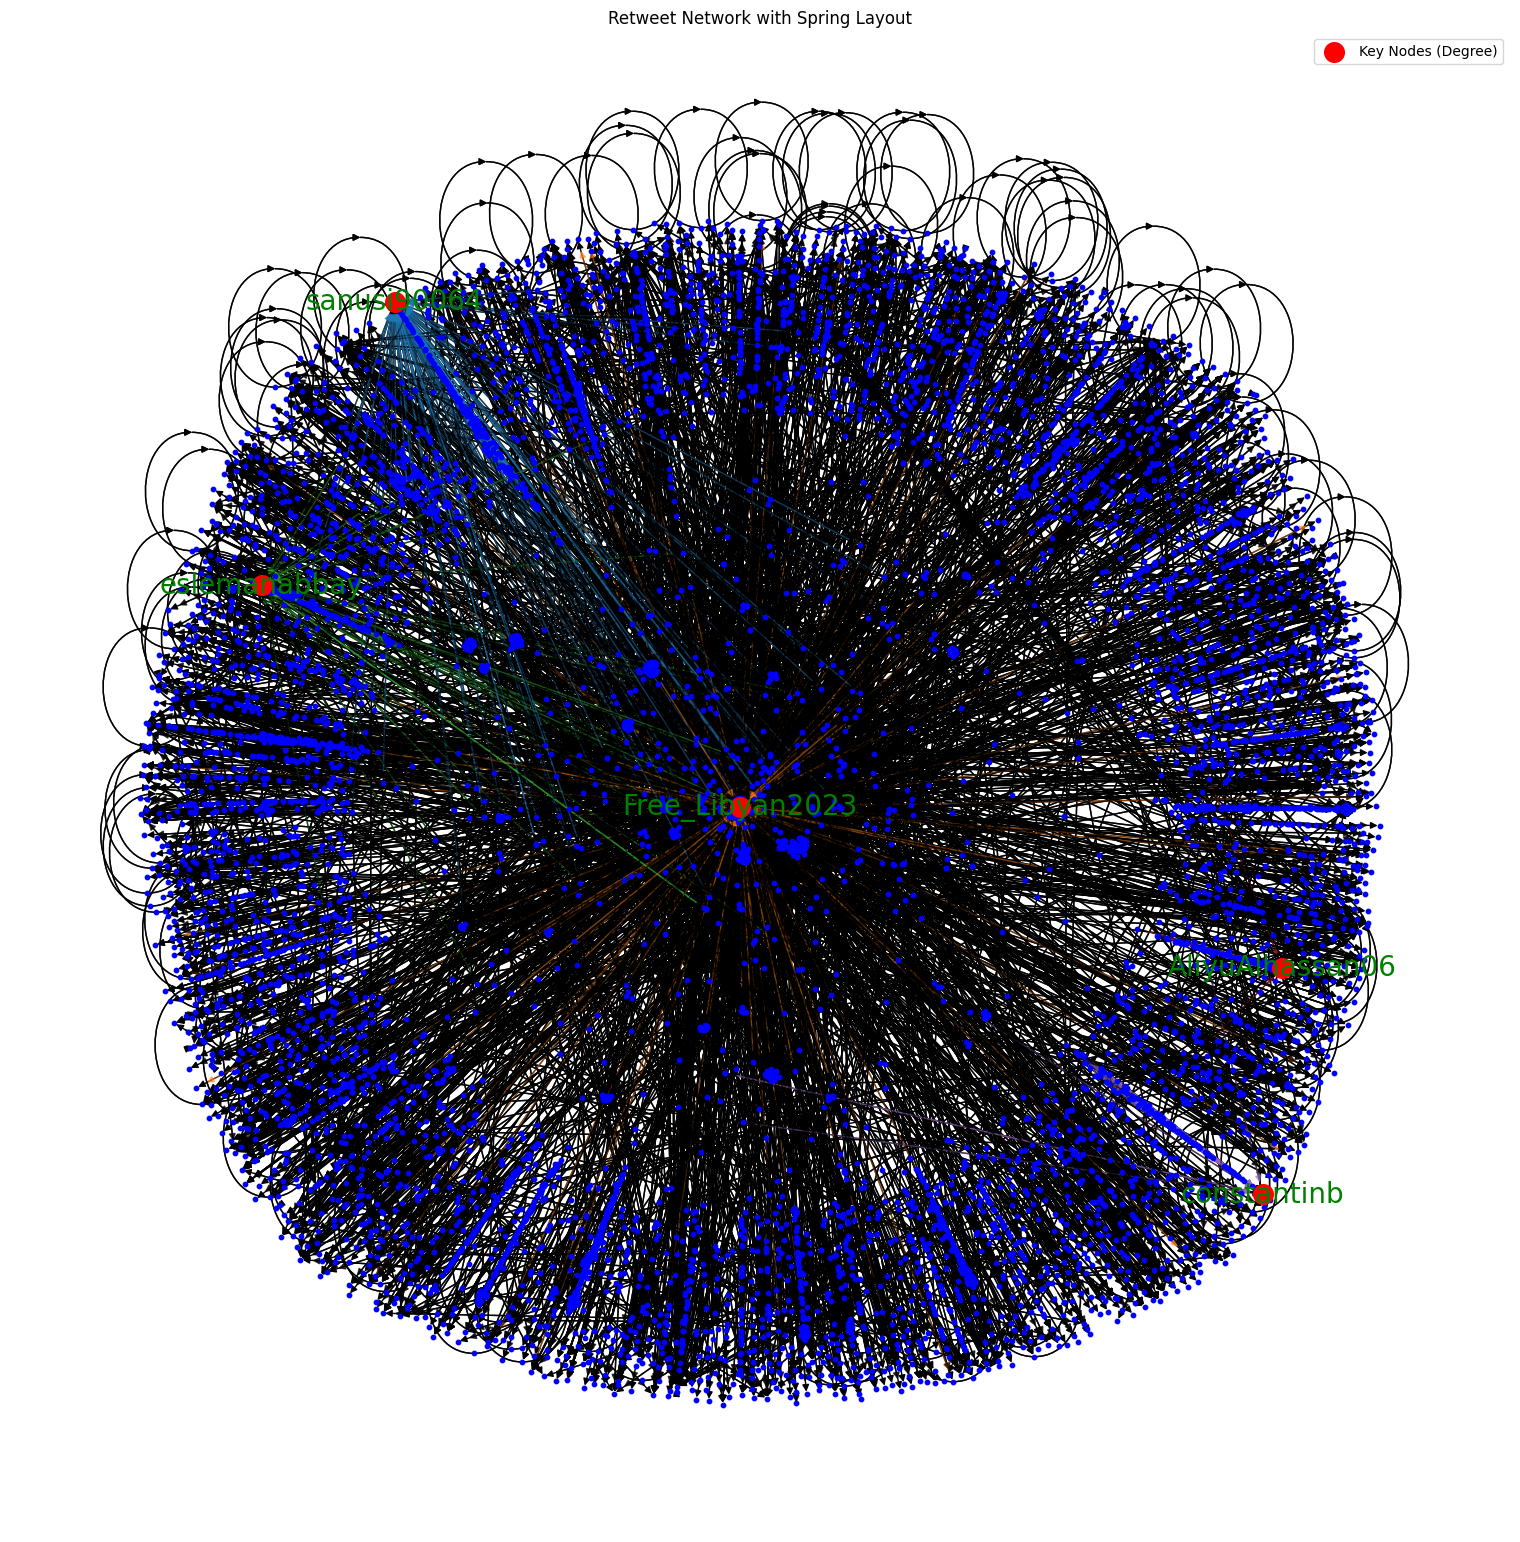

In [ ]:
# creating a directed graph
G = nx.DiGraph()

# nodes of the graph
G.add_nodes_from(df_clustering['author.username'].dropna())

# edges of the graph
G.add_edges_from(zip(df_clustering['author.username'], df_clustering['retweeted_username']))

# calculating the degree centrality to obtained the influential users
degree_centrality = nx.degree_centrality(G)
key_nodes_degree_cl = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

# Community Detection (Louvain Method)
clusters_cl = nx.community.louvain_communities(G)

# layout of the communities
pos = nx.spring_layout(G)

# figure size
plt.figure(figsize=(15, 15))

# The whole graph with key nodes highlighted
nx.draw(G, pos, with_labels=False, font_size=6, font_color='black', node_size=10, node_color='blue')

# black edges
black_edges = [edge for edge in G.edges() if edge not in [(u, v) for u, v in G.edges() if u in key_nodes_degree_cl or v in key_nodes_degree_cl]]
nx.draw_networkx_edges(G, pos, edgelist=black_edges, edge_color='black', alpha=0.5)

# assigining a color template to color egdes for each of the top 5 influential users
user_colors = sns.color_palette("tab10", n_colors=len(key_nodes_degree_cl))
edge_colors = []

# looking through the non-influential users and influential users
for edge in G.edges():
    user1, user2 = edge
    if user1 in key_nodes_degree_cl:
        color_index = key_nodes_degree_cl.index(user1)
        edge_colors.append(user_colors[color_index])   # adding color to influential users
    elif user2 in key_nodes_degree_cl:
        color_index = key_nodes_degree_cl.index(user2)
        edge_colors.append(user_colors[color_index])
    else:
        edge_colors.append('black')  # adding black color to non-influential users

# the colored edges and nodes for the top 5 influential users
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=key_nodes_degree_cl, node_color='red', node_size=200, label='Key Nodes (Degree)')

# the labels for the top 5 influential users
labels = {node: node for node in key_nodes_degree_cl}
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_color='green')

plt.title('Retweet Network with Spring Layout')
plt.legend()
plt.show()


In [ ]:
# displaying the top 5 influential users and the number of people they influenced
print('The top 5 influential users using Degree Centrality are (not in order): \n')
for user in key_nodes_degree_cl:
    for i, cluster in enumerate(clusters_cl):
        if user in cluster:
            influenced_people = sum(1 for node in cluster)
            print(f'{user} influenced {influenced_people} people in Cluster {i + 1}')

The top 5 influential users using Degree Centrality are (not in order): 

sanusi90064 influenced 404 people in Cluster 129
Free_Libyan2023 influenced 524 people in Cluster 47
eslemanabbay influenced 404 people in Cluster 129
AliyuAlhassan06 influenced 137 people in Cluster 63
constantinb influenced 167 people in Cluster 90


***Significance of Connections Within the Network***

In network theory, centrality serves as a metric to evaluate the importance or influence of a node within a network. A node with high centrality is more central to the network, and any modifications to it, such as removal or alteration, can impact the overall structure and functioning of the network. One commonly used measure of centrality is degree centrality, which quantifies the number of connections a node has. This same measure was used to find the top 5 users and clusters displayed on my retweets network, this enabled me to reveal their impact on information flow and influence within the network.

These top 5 users and clusters have a significant impact in terms of information flow. Nodes exhibiting high degree centrality like the top 5 users are typically well-connected to other nodes in the network, enabling them to easily receive and transmit information to a large number of other nodes. These high-degree nodes act as hubs, facilitating the efficient spread of information throughout the network and playing a crucial role in transmitting information quickly to different parts of the network.

They also have a significant impact on the influence within the network. Infleuence can manifest in various forms, including shaping opinions, controlling the flow of resources, or directing the overall dynamics of the network. In social networks, individuals with high degree centrality may exert more influence over their peers, impacting opinions and behaviours. In a business network, a company with a high centrality degree might significantly influence the industry.

High-degree nodes contribute to the overall structure of the network by serving as connectors between different clusters or communities within the network, thereby enhancing its overall cohesion.

***
# ***Question 2***
***

## ***A. Correlation Analysis***

In [ ]:
# creating a function to analyze the corelation between the no of followers of a user and the engagement metrics for specfic psoting times
def correlation_analysis(data, timestamp_column, engagement_metric):

  # converting timestamp_column to datetime
  data[timestamp_column] = pd.to_datetime(data[timestamp_column])

  # extract hour from created_at
  data['hour'] = data['created_at'].dt.hour

  # the bins and labels for followers_count
  no_followers_bins = [0, 50000, 200000, 400000, 600000, 800000, 1000000, 5000000, 11500000]
  no_followers_labels = ['0-50k', '50k-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '1M-5M', '5M-11.5M']


  # creating new column for followers intervals
  data['No of Followers interval'] = pd.cut(data['author.public_metrics.followers_count'], bins=no_followers_bins, labels=no_followers_labels, right=False)

  # figure size
  plt.figure(figsize=(10, 10))
  sns.set(style="darkgrid")

  # plot the data
  sns.lineplot(data=data, x='hour', y=engagement_metric, hue='No of Followers interval', errorbar= None)
  plt.title(f'Mean {engagement_metric} per Hour for Different Followers Count Intervals')
  plt.show()


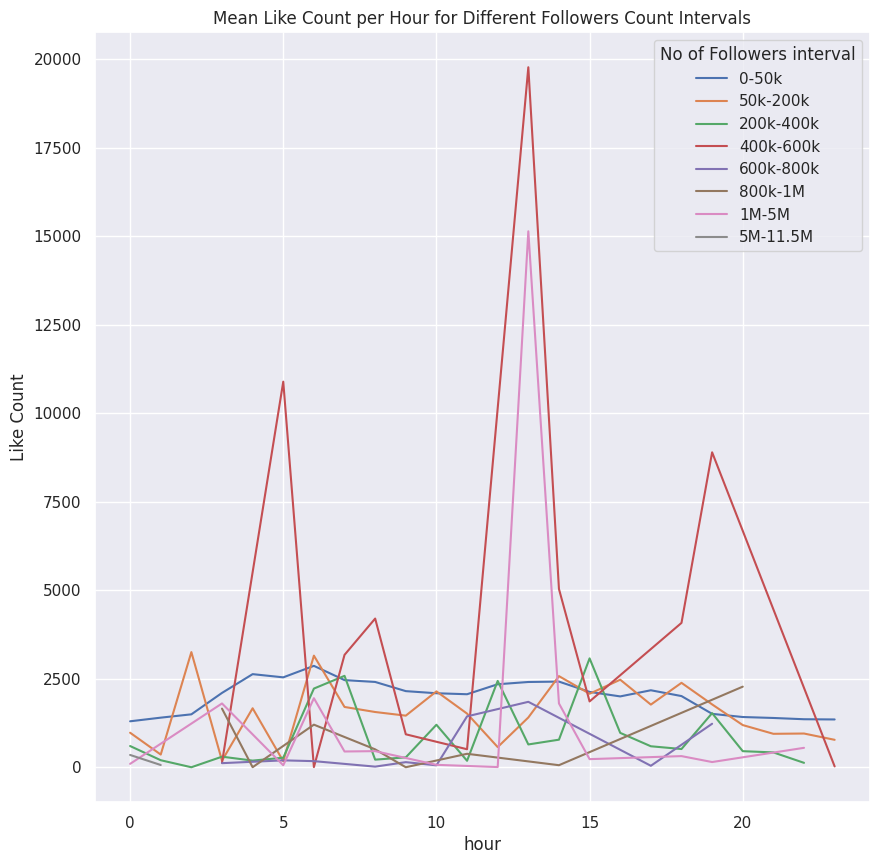

In [ ]:
df.rename(columns={'public_metrics.like_count': 'Like Count'}, inplace=True)
correlation_analysis(df,'created_at', 'Like Count')

The above plot shows the mean like counts per hour for different followers count interval. We can see four clearly defined peaks, the first at 05:00 with about 11k likes, which represents a person with 400k-600k number of followers. The second peak is seen roughly at 13:00 with about 15k likes, representing a person with 1M-5M number of followers. The third peak is seen at the same time (13h00) with 20k likes representing a person with 400k-600k number of followers. The four peak with is seen at roughly 19h00 with about 9k likes representing a person with 400k-600k no of followers. There is no clearly definite relationship between the no of followers and like counts, but we can see that for specfic times like around 10h00 to 20h00 other intervals show more peaks of engagement indicating somehow that those with more followers at specific times have more likes, besides the 0-50k interval which has a more or less constant likes count of 2500.

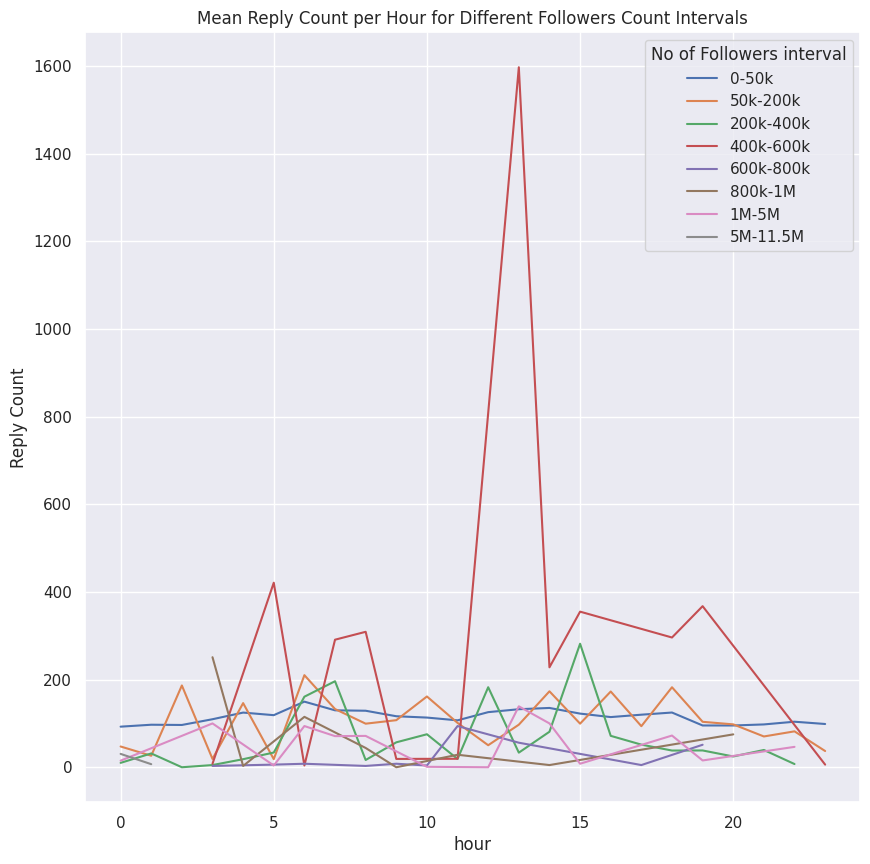

In [ ]:
df.rename(columns={'public_metrics.reply_count': 'Reply Count'}, inplace=True)
correlation_analysis(df, 'created_at', 'Reply Count')

The above plot shows the mean reply counts per hour for different followers count interval. We can see six clearly defined peaks, the first at 05:00 with about 400 replies, which represents a person with 400k-600k number of followers. The second peak is seen roughly at 07:00 with about 300 replies, representing a person with 400k-600k number of followers. The third peak is seen at 13h00 with 1600 replies representing a person with 400k-600k number of followers. The four peak with is seen at roughly 15h00 with about 250 replies representing a person with 200k-400k no of followers. The fifth peak is since at the same hour (15h00) with about 350 replies representing someone with 400k-600k number of followers. The sixth peak is seen at 19h00 with about 380 replies representing someone with 400k-600k number of followers. There is no clearly definite relationship between the no of followers and reply counts, but we can see that for specfic times like around 10h00 to 20h00 other intervals show more peaks of engagement, besides the 0-50k interval which has a more or less constant replies count of 100.

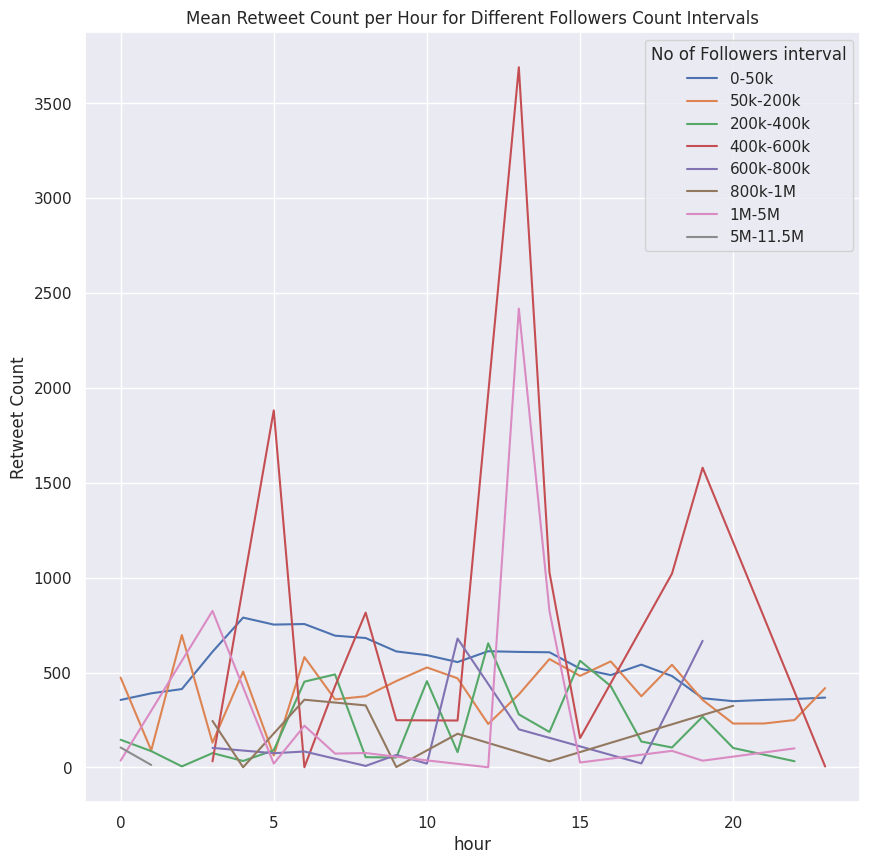

In [ ]:
df.rename(columns={'public_metrics.retweet_count': 'Retweet Count'}, inplace=True)
correlation_analysis(df, 'created_at', 'Retweet Count')

The above plot shows the mean retweet counts per hour for different followers count interval. We can see four clearly defined peaks, the first at 05:00 with about 1800 retweets, which represents a person with 400k-600k number of followers. The second peak is seen roughly at 13:00 with about 2300 retweets, representing a person with 1M-5M number of followers. The third peak is seen at the same time (13h00) with roughly 3700 retweets representing a person with 400k-600k number of followers. The four peak with is seen at roughly 19h00 with about 1550 retweets representing a person with 400k-600k no of followers. There is no clearly definite relationship between the no of followers and retweet counts, but we can see that for specfic times like around 0h00 to 10h00 other intervals show more peaks of engagement indicating somehow that those with more followers at specific times have more retweets.

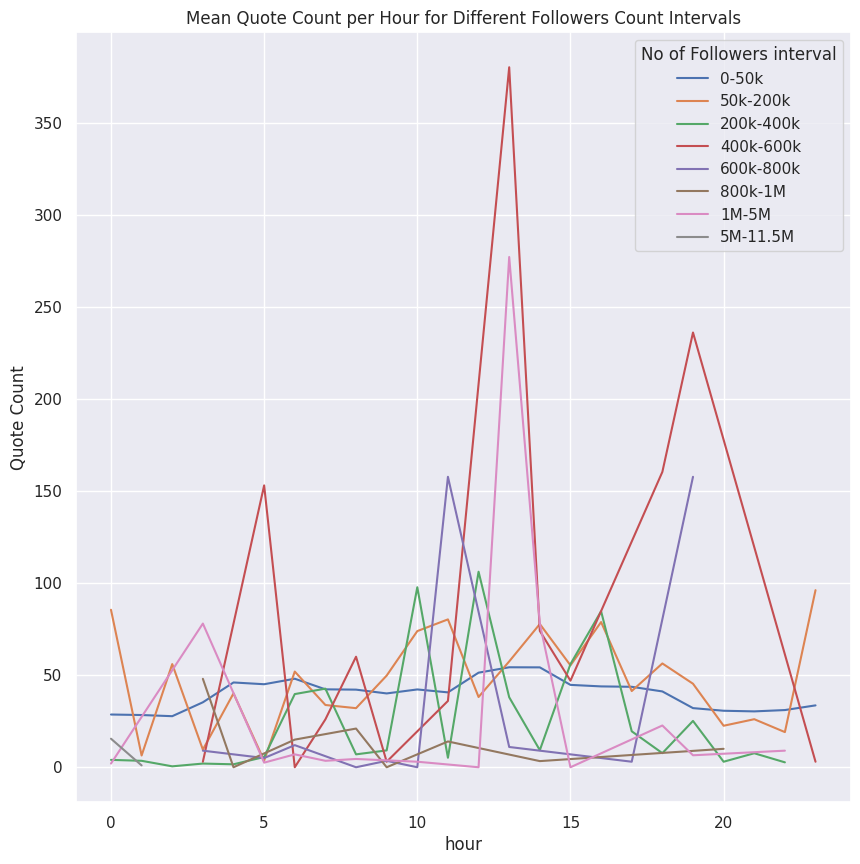

In [ ]:
df.rename(columns={'public_metrics.quote_count': 'Quote Count'}, inplace=True)
correlation_analysis(df, 'created_at', 'Quote Count')

The above plot shows the mean Quote counts per hour for different followers count interval. We can see six clearly defined peaks, the first at 05:00 with about 150 quotes, which represents a person with 400k-600k number of followers.The second The second peak is seen roughly at 11:00 with about 170 quotes, representing a person with 0-50k number of followers. The third peak is seen at 13h00 with 270 quotes representing a person with 1M-5M number of followers. The fourth peak with is seen at the same time (13h00) with about 380 quotes representing a person with 400k-600k no of followers. The fifth peak is seen at 19h00 with 230 quotes representing a person with 400k-600k no of followers. The sixth peak is seen at the same time (19h00) with 160 quotes representing a person with 0-50k no of followers. There is no clearly definite relationship between the no of followers and quote counts, but we can see that for specfic times like around 09h00 to 20h00 other intervals show more peaks of engagement indicating somehow that those with more followers at specific times have more quotes, besides the 0-50k interval which has a more or less constant quotes count of 40-50.

### **Insights into the Relationship Between Influencer Followers and Campaign Success**

Understanding the correlation between an influencer's followers and the success of your product or campaign is crucial. It is imperative to ensure that the audience of the selected influencer aligns seamlessly with the target audience of the campaign. Followers are more likely to engage with content that they can relate to or that connects with them emotionally. Regular and consistent communication with followers is essential for building trust; this can significantly boost campaign success, showcasing how much the influencer cares about their followers.

To quantify and monitor the success of the campaign, assess engagement metrics (e.g., likes, comments, shares, etc.) and evaluate the sentiment surrounding the influencer and your campaign. Utilize social media sentiment analysis tools to gauge the overall attitude of the audience. Based on the engagement metrics, sentiment analysis, and the social media platforms used, you must be adaptable and prepared to adjust your strategy based on the evolving landscape of social media to ensure campaign success.

## ***B. Average Engagement Metrics for specfic Time Intervals***

In [ ]:
# function to analyze the volume of tweets according to a specific time interval
def plot_engagement_metrics(data, time_interval):
    # creating temporary dataframe
    data = data.copy()
    # converting the column to a datatime format
    data['created_at'] = pd.to_datetime(data['created_at'])

    # extract the chosen time interval from the datetime
    if time_interval == 'hour':
        data['interval'] = data['created_at'].dt.hour
    elif time_interval == 'day':
        data['interval'] = data['created_at'].dt.date
    elif time_interval == 'month':
        data['interval'] = data['created_at'].dt.month
    elif time_interval == 'day_of_week':
        data['interval'] = data['created_at'].dt.day_name()
    else:
        raise ValueError(f"Invalid time interval: {time_interval}")

    # engagement metrics used
    engagement_metrics = [
        'Reply Count',
        'Retweet Count',
        'Quote Count',
        'Like Count'
    ]

    # group by the chosen time interval and average metrics
    grouped_df = data.groupby('interval').agg({
        'Reply Count': 'mean',
        'Retweet Count': 'mean',
        'Quote Count': 'mean',
        'Like Count': 'mean'
    }).reset_index()

    # melt the dataframe for easy plotting
    melted_df = pd.melt(grouped_df, id_vars=['interval'], value_vars=engagement_metrics, var_name='Metric', value_name='Count')

    # set Seaborn style
    sns.set(style="whitegrid")

    # plotting as a bar graph using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='interval', y='Count', hue='Metric', data=melted_df)
    plt.xlabel(f'{time_interval.capitalize()}')
    plt.ylabel('Total Average Count')
    plt.title(f'Average Engagement Metrics by {time_interval.capitalize()}')
    plt.show()

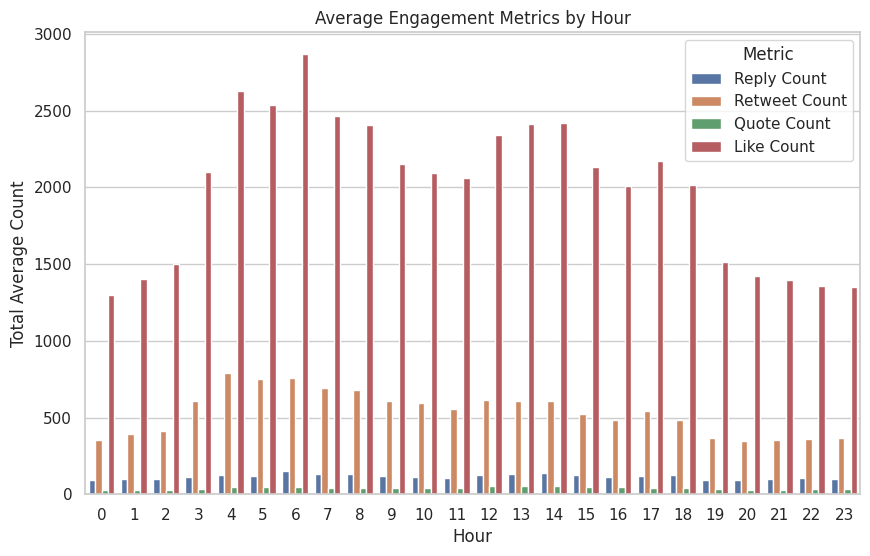

In [ ]:
plot_engagement_metrics(df, 'hour')

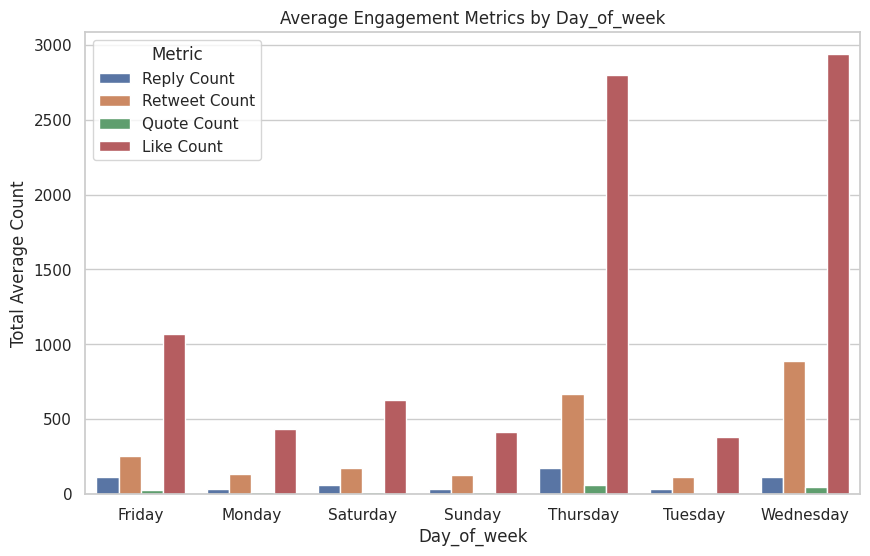

In [ ]:
plot_engagement_metrics(df, 'day_of_week')

## **Optimal Posting Times for Maximum Engagement**

Examining the figure above, the first graph illustrates the average engagement metrics count per day, encompassing Reply Count, Retweet Count, Quote Count, and Like Count. Based on my analysis, I would recommend that the optimal posting time(s) fall between ***04:00 to 06:00***, with the most favorable days being ***Thursday and Wednesday*** to achieve maximum engagement from your followers. During these times, there is a noticeable increase in likes, retweets, and reply counts, indicating higher overall engagement.